<a href="https://colab.research.google.com/github/LidaMirzaei/AirSurf-Lettuce/blob/master/AIAs3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

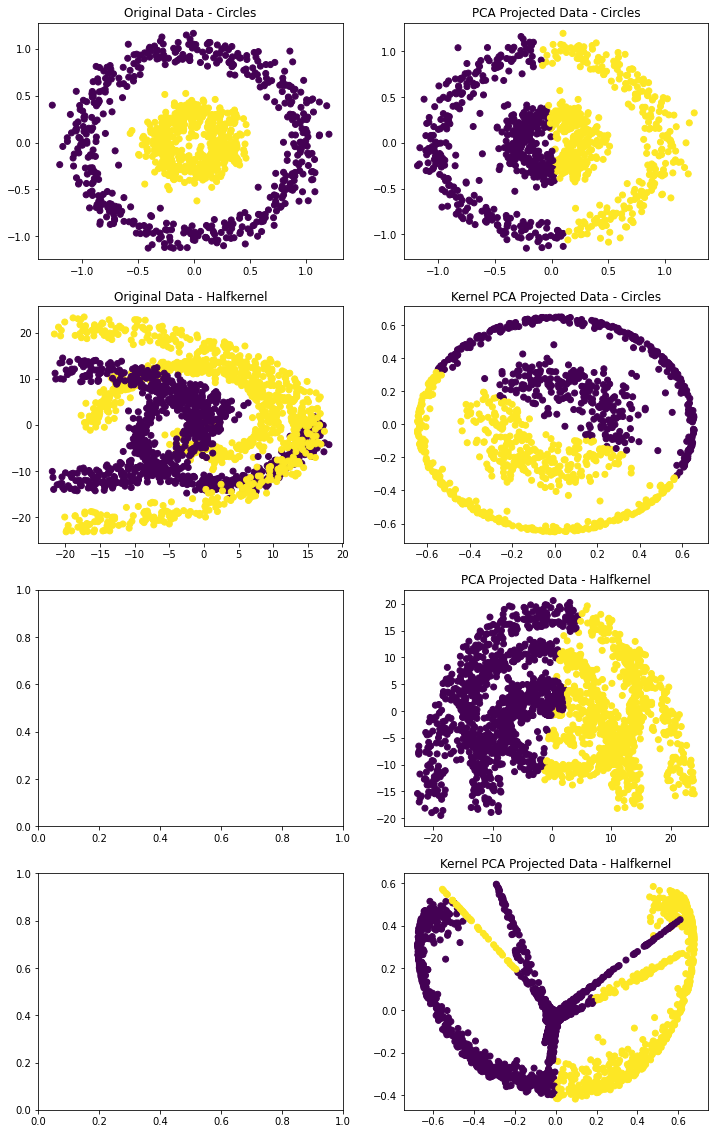

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

# Load datasets
circles = pd.read_csv("/content/circles0.30.csv")
moons = pd.read_csv("/content/moons1.csv")
spiral = pd.read_csv("/content/spiral1.csv")
halfkernel = pd.read_csv("/content/halfkernel.csv")

# Perform PCA and kernel PCA on all datasets
pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=2, kernel='rbf')

circles_pca = pca.fit_transform(circles.iloc[:, :-1])
circles_kpca = kernel_pca.fit_transform(circles.iloc[:, :-1])

moons_pca = pca.fit_transform(moons.iloc[:, :-1])
moons_kpca = kernel_pca.fit_transform(moons.iloc[:, :-1])

spiral_pca = pca.fit_transform(spiral.iloc[:, :-1])
spiral_kpca = kernel_pca.fit_transform(spiral.iloc[:, :-1])

halfkernel_pca = pca.fit_transform(halfkernel.iloc[:, :-1])
halfkernel_kpca = kernel_pca.fit_transform(halfkernel.iloc[:, :-1])

# Apply k-Means clustering to the projected data
kmeans = KMeans(n_clusters=2, random_state=0)

circles_labels_pca = kmeans.fit_predict(circles_pca)
circles_labels_kpca = kmeans.fit_predict(circles_kpca)

moons_labels_pca = kmeans.fit_predict(moons_pca)
moons_labels_kpca = kmeans.fit_predict(moons_kpca)

spiral_labels_pca = kmeans.fit_predict(spiral_pca)
spiral_labels_kpca = kmeans.fit_predict(spiral_kpca)

halfkernel_labels_pca = kmeans.fit_predict(halfkernel_pca)
halfkernel_labels_kpca = kmeans.fit_predict(halfkernel_kpca)

# Plot original data and projected data with clusters
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))

axs[0, 0].scatter(circles.iloc[:, 0], circles.iloc[:, 1], c=circles.iloc[:, 2])
axs[0, 0].set_title("Original Data - Circles")
axs[0, 1].scatter(circles_pca[:, 0], circles_pca[:, 1], c=circles_labels_pca)
axs[0, 1].set_title("PCA Projected Data - Circles")
axs[1, 1].scatter(circles_kpca[:, 0], circles_kpca[:, 1], c=circles_labels_kpca)
axs[1, 1].set_title("Kernel PCA Projected Data - Circles")

axs[1, 0].scatter(moons.iloc[:, 0], moons.iloc[:, 1], c=moons.iloc[:, 2])
axs[1, 0].set_title("Original Data - Moons")
axs[2, 1].scatter(moons_pca[:, 0], moons_pca[:, 1], c=moons_labels_pca)
axs[2, 1].set_title("PCA Projected Data - Moons")
axs[3, 1].scatter(moons_kpca[:, 0], moons_kpca[:, 1], c=moons_labels_kpca)
axs[3, 1].set_title("Kernel PCA Projected Data - Moons")

axs[1, 0].scatter(spiral.iloc[:, 0], spiral.iloc[:, 1], c=spiral.iloc[:, 2])
axs[1, 0].set_title("Original Data - Spiral")
axs[2, 1].scatter(spiral_pca[:, 0], spiral_pca[:, 1], c=spiral_labels_pca)
axs[2, 1].set_title("PCA Projected Data - Spiral")
axs[3, 1].scatter(spiral_kpca[:, 0], spiral_kpca[:, 1], c=spiral_labels_kpca)
axs[3, 1].set_title("Kernel PCA Projected Data - Spiral")

axs[1, 0].scatter(halfkernel.iloc[:, 0], halfkernel.iloc[:, 1], c=halfkernel.iloc[:, 2])
axs[1, 0].set_title("Original Data - Halfkernel")
axs[2, 1].scatter(halfkernel_pca[:, 0], halfkernel_pca[:, 1], c=halfkernel_labels_pca)
axs[2, 1].set_title("PCA Projected Data - Halfkernel")
axs[3, 1].scatter(halfkernel_kpca[:, 0], halfkernel_kpca[:, 1], c=halfkernel_labels_kpca)
axs[3, 1].set_title("Kernel PCA Projected Data - Halfkernel")

plt.show()